In [1]:
import json
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
%%HTML
<style>

# .CodeMirror {
#     width: 100vw;
# }

# .container {
#     width: 99% !important;
# }

# .rendered_html {
#   font-size:0.8em;
# }
# .rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
#      font-size: 100%;
# }

.rendered_html h1 {
    font-size: 5em !important;
}

.rendered_html h2 {
    font-size: 2.5em !important;
}

.rendered_html h3 {
    font-size: 2em !important;
}

.rendered_html li, .rendered_html p {
    font-size: 1.3em !important;
}

</style>

# AutoML
## Marcos Meyer Hollerweger

### Motivação

- Crescente sucesso do uso de machine learning nas mais diversas áreas desperta o interesse em não-especialistas
- Nenhum modelo é perfeito, mas alguns são úteis
- Nenhum algoritmo tem boa performance em todos os problemas
- A performance de todos os algoritmos depende da escolha de hiper-parâmetros
- Poder computacional é barato e virtualmente infinito

### Definição de AutoML

Seja $ \boldsymbol{x}_i \in \mathbb{R}^d$ um vetor de atributos, e $y_i \in Y$ os rótulos correspondentes de um conjunto de dados, para $ i = 1, ... , n+m$ exemplos. Seja $ D_{train} = {(\boldsymbol{x}_1, y_1), ... , (\boldsymbol{x}_n, y_n)} $ o conjunto de treinamento, e $ D_{test} = {(\boldsymbol{x}_{n+1}, y_{n+1}), ... , (\boldsymbol{x}_{n+m}, y_{n+m})} $ o conjunto de teste, ambos bons representantes de uma distribuição de dados.

Também é definido um limite de recursos $b$ e uma métrica de perda $\mathcal{L}$. Um sistema AutoML deve produzir predições para o conjunto de teste $ \hat{y}_{n+1}, ... , \hat{y}_{n+m} $, minimizando $\mathcal{L}$, e não excedendo $b$.

### Como fazer isso

- Problema CASH - Combined Algorithm Selection and Hyperparameter optimization
- Definir um espaço que compreende todos os algoritmos e seus hiper-parâmetros, e encontrar a solução que minimiza a perda
- Solução simples - Percorrer todo o espaço em busca da melhor solução
- Solução inteligente - Otimização Bayesiana é útil para atacar os dois problemas

### auto-sklearn

- Emprega machine learning para criar modelos de machine learning - "meta-learning"
- É capaz de inferir, através de modelos probabilísticos, os algoritmos com maior chance de sucesso, de acordo com as características do conjunto de dados
- Construção automatizada de modelos ensemble - constrói modelo híbrido a partir de vários algoritmos, aumentando a robustez e diminuindo a chance de overfitting

### auto-sklearn

![auto-sklearn1](img/1.png)

### auto-sklearn

14 algoritmos de classificação

![auto-sklearn2](img/2.png)

### auto-sklearn

15 métodos de pré-processamento

![auto-sklearn3](img/3.png)

In [3]:
import pandas as pd
import numpy as np

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt 
%matplotlib inline
import autosklearn.regression
import autosklearn.classification

### Exemplos!

In [4]:
X, y = sklearn.datasets.load_boston(return_X_y=True)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
feature_types = (['numerical'] * 3) + ['categorical'] + (['numerical'] * 9)

X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120, per_run_time_limit=30,
    tmp_folder='/tmp/autoslearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out')

automl.fit(X_train, y_train, dataset_name='boston',
           feat_type=feature_types)

[WARNING] [2018-06-07 05:09:22,451:AutoMLSMBO(1)::boston] Could not find meta-data directory /usr/local/lib/python3.5/dist-packages/autosklearn/metalearning/files/r2_regression_dense


In [6]:
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))
print("RMSE score:", sklearn.metrics.mean_squared_error(y_test, predictions))

R2 score: 0.883079496654
RMSE score: 11.5819665889


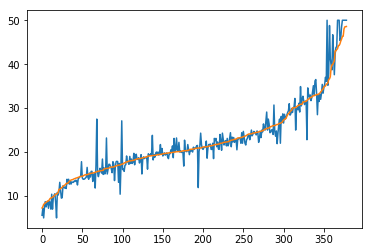

In [7]:
predictions = automl.predict(X_train)

order = np.argsort(predictions)
plt.plot(y_train[order])
plt.plot(np.sort(predictions))

In [8]:
print(automl.show_models()[:1300])

[(0.720000, SimpleRegressionPipeline({'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'preprocessor:__choice__': 'no_preprocessing', 'regressor:random_forest:min_weight_fraction_leaf': 0.0, 'regressor:random_forest:min_samples_leaf': 1, 'regressor:__choice__': 'random_forest', 'rescaling:__choice__': 'standardize', 'regressor:random_forest:min_samples_split': 2, 'categorical_encoding:__choice__': 'one_hot_encoding', 'regressor:random_forest:max_features': 1.0, 'imputation:strategy': 'mean', 'regressor:random_forest:criterion': 'mse', 'regressor:random_forest:min_impurity_decrease': 0.0, 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:max_depth': 'None', 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01, 'regressor:random_forest:n_estimators': 100, 'regressor:random_forest:max_leaf_nodes': 'None'},
dataset_properties={
  'target_type': 'regression',
  'signed': False,
  'sparse': False,
  'multilabel': False,
  'task': 4,
  'multi

### Exercício 3 - Dataset Iris 

In [9]:
X, y = sklearn.datasets.load_iris(return_X_y=True)
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)
    
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120, per_run_time_limit=30,
    tmp_folder='/tmp/autoslearn_classification_example_tmp',
    output_folder='/tmp/autosklearn_classification_example_out')

automl.fit(X_train, y_train)

In [11]:
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.973684210526


In [13]:
print(automl.show_models()[:1300])

[(0.920000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'extra_trees', 'classifier:extra_trees:min_samples_leaf': 16, 'preprocessor:extra_trees_preproc_for_classification:min_weight_fraction_leaf': 0.0, 'rescaling:__choice__': 'none', 'preprocessor:extra_trees_preproc_for_classification:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'preprocessor:extra_trees_preproc_for_classification:n_estimators': 100, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'classifier:extra_trees:min_samples_split': 14, 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'entropy', 'preprocessor:extra_trees_preproc_for_classification:min_samples_leaf': 2, 'preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:extra_trees:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_classification:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_classification:min_i

### Aplicações com imagem

In [12]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/GbLQE2C181U" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>